In [1]:
pip install python-dotenv

  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
pip install langchain

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached greenlet-3.0.3-cp312-cp312-win_amd64.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/983.6 kB ? eta -:--:--
   --------------- ------------------------ 389.1/983.6 kB 8.1 MB/s eta 0:00:01
   ------------------------------- -------- 768.0/983.6 kB 9.7 MB/s eta 0:00:01
   ------------------------------- -------- 768.0/983.6 kB 9.7 MB/s eta 0:00:01
   ------------------------------- -------- 768.0/983.6 kB 9.7 MB/s eta 0:00:01
   ---------------------------------------- 983.6/983.6 kB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ------- -------------------------------- 0.4/2.1 MB 7.6 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/2.1 MB 8.8 MB/s eta 0:00:01
   --------------------------- ------------ 1.4/2.1 MB 11.3 MB/s eta 0:00:01
   --------------------------------- ------ 1.7/2.1 MB 11.1 MB/s eta 0:00:01
   --------------------------------- ------ 1.7/2.1 MB 11.1 MB/s eta 0:00:01
  

In [9]:
pip install langchain-core langgraph

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from langchain_core.messages import HumanMessage
from langgraph.graph import END,MessageGraph

def add_one(input:list[HumanMessage]):
    input[0].content=input[0].content + "a"
    return input

graph=MessageGraph()
graph.add_node("branch_a", add_one)
graph.add_edge("branch_a", "branch_b")
graph.add_edge("branch_a", "branch_c")

graph.add_node("branch_b", add_one)
graph.add_node("branch_c", add_one)

graph.add_edge("branch_b", "final_node")
graph.add_edge("branch_c", "final_node")

graph.add_node("final_node", add_one)
graph.add_edge("final_node", END)

graph.set_entry_point("branch_a")

runnable = graph.compile()

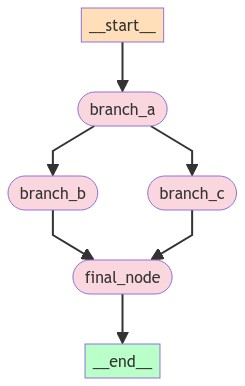

In [15]:
from IPython.display import Image, display

display(Image(runnable.get_graph().draw_mermaid_png()))

In [16]:
runnable.invoke("a")

[HumanMessage(content='aaaaa', id='304895de-320a-4ac1-b9f7-616cc5aa3d42')]

In [17]:
def entry(input:  list[HumanMessage]):
    return input

def work_with_b(input: list[HumanMessage]):
    print("Using branvch b")
    return input

def work_with_c(input: list[HumanMessage]):
    print("Using branvch c")
    return input

def router(input: list[HumanMessage]):
    if "use_b" in input[0].content:
        return "branch_b"
    else:
        return "branch_c"

graph=MessageGraph()

graph.add_node("branch_a",entry)
graph.add_node("branch_b",work_with_b)
graph.add_node("branch_c",work_with_c)

graph.add_conditional_edges(
    "branch_a", router, {"branch_b": "branch_b", "branch_c": "branch_c"}
)
graph.add_edge("branch_b", END)
graph.add_edge("branch_c", END)

graph.set_entry_point("branch_a")

runnable = graph.compile()

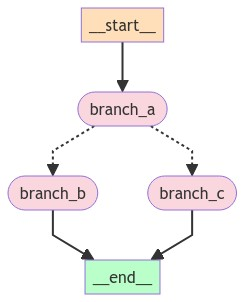

In [18]:

display(Image(runnable.get_graph().draw_mermaid_png()))

In [19]:

runnable.invoke("hello")

Using branvch c


[HumanMessage(content='hello', id='92fb17f5-ebdc-4e80-aa75-72c47c065001')]

In [20]:
runnable.invoke("I want to use_b")


Using branvch b


[HumanMessage(content='I want to use_b', id='1522a642-6986-4f93-bf3c-c46485050dc5')]

In [24]:
pip install langchain-openai

   ---------------------------------------- 0.0/45.9 kB ? eta -:--:--
   ---------------------------------------- 45.9/45.9 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/328.5 kB ? eta -:--:--
   ---------------------------------------  327.7/328.5 kB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 328.5/328.5 kB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/799.3 kB ? eta -:--:--
   ----------------------------- --------- 614.4/799.3 kB 13.1 MB/s eta 0:00:01
   --------------------------------------- 799.3/799.3 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.9.0
    Uninstalling openai-1.9.0:
      Successfully uninstalled openai-1.9.0
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['OPENAI_API_KEY']=os.getenv("OPENAI_API_KEY")

In [32]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph

model = ChatOpenAI(temperature=0)


def entry(input: list[HumanMessage]):
    return input


def action(input: list[HumanMessage]):
    print("Action taken:", [msg.content for msg in input])
    if len(input) > 5:
        input.append(HumanMessage(content="end"))
    else:
        input.append(HumanMessage(content="continue"))
    return input


def should_continue(input: list):
    last_message = input[-1]
    if "end" in last_message.content:
        return "__end__"
    return "action"


graph = MessageGraph()

graph.add_node("agent", entry)
graph.add_node("action", action)

graph.add_conditional_edges(
    "agent", should_continue, {"action": "action", "__end__": END}
)
graph.add_edge("action", "agent")

graph.set_entry_point("agent")

runnable = graph.compile()


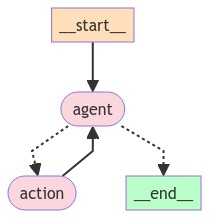

In [33]:
display(Image(runnable.get_graph().draw_mermaid_png()))


In [34]:
runnable.invoke("Hello")


Action taken: ['Hello']
Action taken: ['Hello', 'continue']
Action taken: ['Hello', 'continue', 'continue']
Action taken: ['Hello', 'continue', 'continue', 'continue']
Action taken: ['Hello', 'continue', 'continue', 'continue', 'continue']
Action taken: ['Hello', 'continue', 'continue', 'continue', 'continue', 'continue']


[HumanMessage(content='Hello', id='435cbd18-36dd-4c3c-a5af-e0bc3f40d8a6'),
 HumanMessage(content='continue', id='381765ed-10ed-4941-bffe-6471c4908219'),
 HumanMessage(content='continue', id='1d70323f-07cf-4505-b749-03ac5b40661d'),
 HumanMessage(content='continue', id='0f7476c6-00dd-4cfd-a027-4cb60ad4cfd3'),
 HumanMessage(content='continue', id='75d7cc51-6ad1-4cc6-b417-60385e3f0153'),
 HumanMessage(content='continue', id='f007b4f8-5dff-4d77-878e-bd6e0ff6c941'),
 HumanMessage(content='end', id='c5cc5702-f8fe-4d79-9916-f2bd8704ae4d')]

In [3]:
pip install langchain-google-genai

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.2.7 requires langchain-core<0.3.0,>=0.2.12, but you have langchain-core 0.3.10 which is incompatible.
langchain-openai 0.1.14 requires langchain-core<0.3,>=0.2.2, but you have langchain-core 0.3.10 which is incompatible.
langchain-text-splitters 0.2.2 requires langchain-core<0.3.0,>=0.2.10, but you have langchain-core 0.3.10 which is incompatible.
langgraph 0.1.6 requires langchain-core<0.3,>=0.2.11, but you have langchain-core 0.3.10 which is incompatible.
streamlit 1.30.0 requires protobuf<5,>=3.20, but you have protobuf 5.28.2 which is incompatible.

[notice] A new releas


  Using cached langchain_google_genai-2.0.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_generativeai-0.8.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached langchain_core-0.3.10-py3-none-any.whl.metadata (6.3 kB)
  Using cached google_ai_generativelanguage-0.6.10-py3-none-any.whl.metadata (5.6 kB)
  Using cached google_api_core-2.21.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached google_api_python_client-2.149.0-py2.py3-none-any.whl.metadata (6.7 kB)
  Using cached google_auth-2.35.0-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached proto_plus-1.24.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached langsmith-0.1.134-py3-none-any.whl.metadata (13 kB)
  Using cached pydantic-2.9.2-py3-none-any.whl.metadata (149 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached googleapis_common_protos-1.65.0-py2.py3-none-any.whl.metadata (1.5 kB)
  Using cached pyasn1_modules-0.4.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9-py

In [8]:
pip install langchain-groq 

  Using cached langchain_groq-0.2.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached groq-0.11.0-py3-none-any.whl.metadata (13 kB)
Using cached langchain_groq-0.2.0-py3-none-any.whl (14 kB)
Using cached groq-0.11.0-py3-none-any.whl (106 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")

In [12]:
llm.invoke("Tell me a Poem")

AIMessage(content="**Ode to Tranquility**\n\nIn tranquil realms, where whispers roam,\nA sanctuary of peace, a heavenly home.\nWhere worries fade and troubles cease,\nA haven of serenity, a profound release.\n\nSoft breezes dance with gentle sway,\nWhispering secrets through leaves of bay.\nThe sun's embrace, a golden hue,\nPaints nature's canvas, vibrant and true.\n\nBirdsong fills the air with sweet delight,\nAs twilight paints the sky with hues of night.\nThe stars above, like diamonds bright,\nGuide us through darkness, with their ethereal light.\n\nIn this tranquil haven, we find our peace,\nA respite from life's relentless chase.\nOur minds unwind, our spirits soar,\nAs we embrace the calm forevermore.\n\nTranquility, a balm for weary souls,\nA sanctuary where harmony unfolds.\nMay its gentle embrace forever stay,\nGuiding us through life's tumultuous fray.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'S

In [2]:
'''from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")'''
from langchain_groq import ChatGroq
import os
llm2=ChatGroq(model_name="Gemma2-9b-It")

In [3]:
llm2.invoke("Tell me Poem")

AIMessage(content='Please give me some more information! I need a little direction to write a poem for you.  \n\nFor example, tell me:\n\n* **What topic should the poem be about?** (love, nature, loss, hope, etc.)\n* **What style or tone do you prefer?** (funny, serious, romantic, reflective, etc.)\n* **Should it be short or long?** \n* **Is there a particular form you have in mind?** (sonnet, haiku, free verse, etc.)\n\n\nThe more details you give me, the better poem I can write for you! 😊  \n\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 133, 'prompt_tokens': 12, 'total_tokens': 145, 'completion_time': 0.241818182, 'prompt_time': 8.6e-05, 'queue_time': 0.014258229, 'total_time': 0.241904182}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-8f2e9c47-bdb3-4f9e-a44f-8f09880aadf4-0', usage_metadata={'input_tokens': 12, 'output_tokens': 133, 'total_tokens': 145})

SIMPLE AI ASISTANT

In [4]:
while True:
    question=input("Enter the Question your bot is here to assit you to write quit")
    if question!="quit":
        print(llm2.invoke(question))
    else:
        print("Thankyou for visiting us Hope Your Doubts Are solved")
        break

Thankyou for visiting us Hope Your Doubts Are solve


In [5]:
pip install -U langchain langchain-openai


  Using cached langchain_text_splitters-0.3.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ------------------- -------------------- 0.5/1.0 MB 10.5 MB/s eta 0:00:01
   --------------------------------- ------ 0.8/1.0 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/49.7 kB ? eta -:--:--
   ---------------------------------------- 49.7/49.7 kB 2.5 MB/s eta 0:00:00
Using cached langchain_text_splitters-0.3.0-py3-none-any.whl (25 kB)
   ---------------------------------------- 0.0/383.7 kB ? eta -:--:--
   --------------------------------------  378.9/383.7 kB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 383.7/383.7 kB 7.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/199.0 kB ? eta -:--:--
   ----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langgraph 0.1.6 requires langchain-core<0.3,>=0.2.11, but you have langchain-core 0.3.10 which is incompatible.
streamlit 1.30.0 requires protobuf<5,>=3.20, but you have protobuf 5.28.2 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
GOOGLE_API_KEY=os.getenv("google_api_key")
# TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("groq_api_key")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT=os.getenv("LANGCHAIN_PROJECT")

In [15]:
print(LANGCHAIN_PROJECT)

None


In [17]:
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
# os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"]= GROQ_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = "true"
# os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
# os.environ["LANGCHAIN_PROJECT"]=LANGCHAIN_PROJECT

In [18]:
print(LANGCHAIN_PROJECT)

None
